Installing libraries

In [ ]:
# 1. Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# Load the cleaned dataset, parse dates
df = pd.read_csv("C:\\Users\\ssbap\\US-Consumer-Complaints-Forecasting\\data\\processed\\cleaned_consumer_complaints.csv",
    parse_dates=['date_received']
)

In [ ]:
# 2. Inspect the dataset
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
print(df.info())
print("\nSample rows:")
display(df.head())

# Check unique products
print("\nUnique products:", df['product'].nunique())
print(df['product'].value_counts().head())


Shape: (555957, 16)

Columns: ['date_received', 'product', 'sub_product', 'issue', 'sub_issue', 'company_public_response', 'company', 'state', 'zipcode', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response', 'consumer_disputed?', 'complaint_id']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 555957 non-null  datetime64[ns]
 1   product                       555957 non-null  object        
 2   sub_product                   555957 non-null  object        
 3   issue                         555957 non-null  object        
 4   sub_issue                     555957 non-null  object        
 5   company_public_response       555957 non-null  object        
 6   company                     

,date_received,product,sub_product,issue,sub_issue,company_public_response,company,state,zipcode,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Unknown,Unknown,U.S. Bancorp,CA,95993,Unknown,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Unknown,Unknown,Wells Fargo & Company,CA,91104,Unknown,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,2013-08-30,Credit reporting,Unknown,Incorrect information on credit report,Account status,Unknown,Wells Fargo & Company,NY,11764,Unknown,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,Unknown,"Navient Solutions, Inc.",MD,21402,Unknown,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,Unknown,Resurgent Capital Services L.P.,GA,30106,Unknown,Web,08/30/2013,Closed with explanation,Yes,Yes,511067



Unique products: 11
product
Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Name: count, dtype: int64


In [12]:
# 3. Prepare time series index
#    - set date_received as index and sort
df = df.set_index('date_received').sort_index()

C:\Users\ssbap\AppData\Local\Temp\ipykernel_12508\2068626746.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_total = df.resample('M').size()


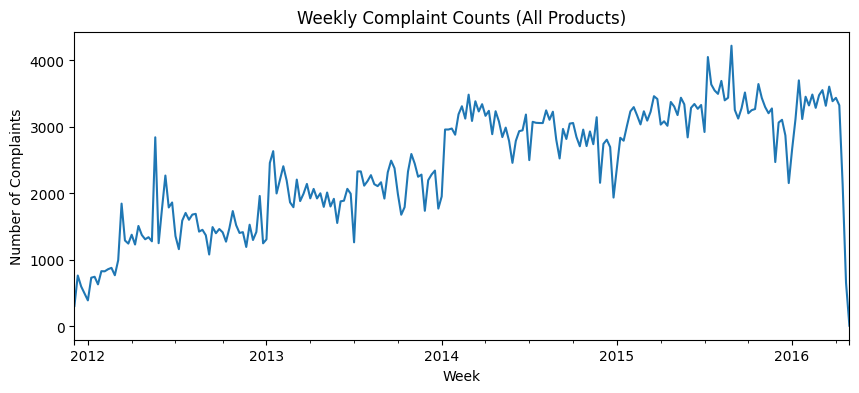

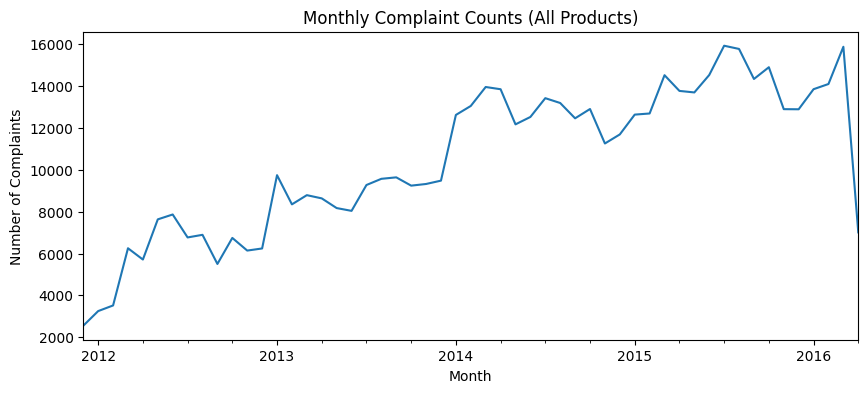

In [13]:
# 4. Resample overall complaints by week and month
weekly_total = df.resample('W').size()
monthly_total = df.resample('M').size()

# Plot weekly totals
plt.figure(figsize=(10,4))
weekly_total.plot()
plt.title('Weekly Complaint Counts (All Products)')
plt.ylabel('Number of Complaints')
plt.xlabel('Week')
plt.show()

# Plot monthly totals
plt.figure(figsize=(10,4))
monthly_total.plot()
plt.title('Monthly Complaint Counts (All Products)')
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.show()

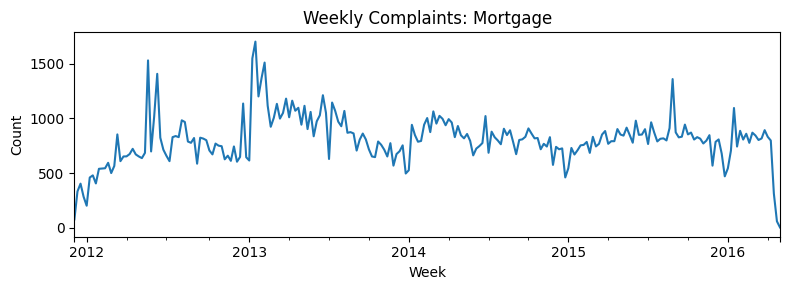

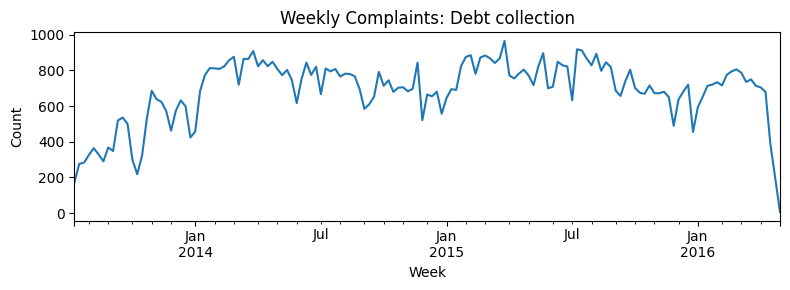

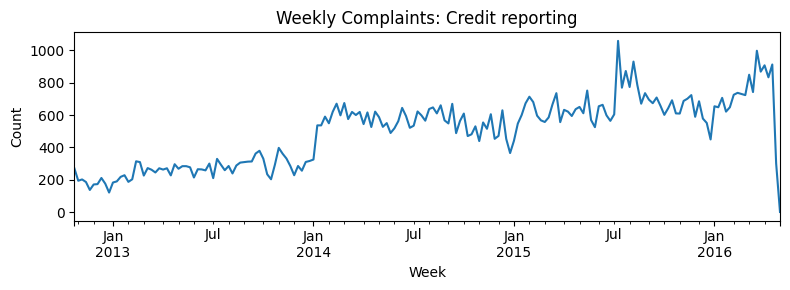

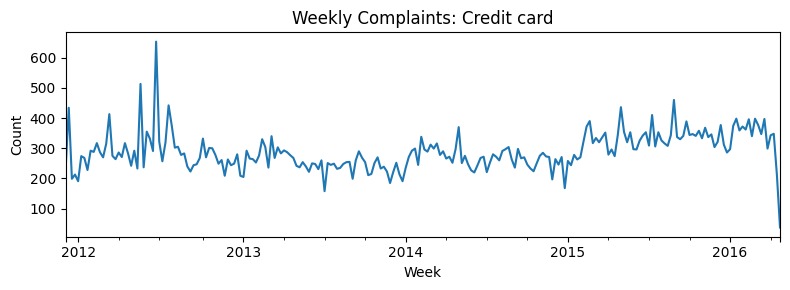

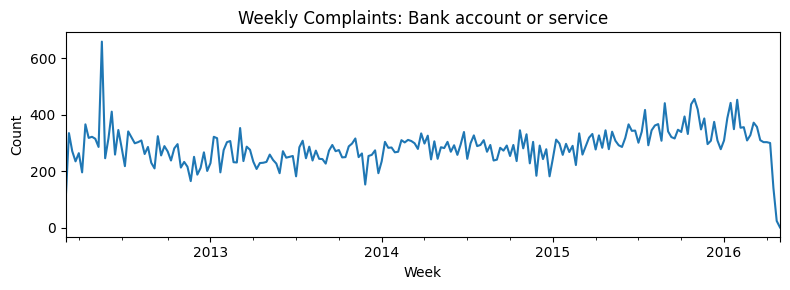

In [14]:
# 5. Resample per-product complaints by week
#    and plot the top 5 products
top5 = df['product'].value_counts().nlargest(5).index

for prod in top5:
    weekly_prod = df[df['product'] == prod].resample('W').size()
    plt.figure(figsize=(8, 3))
    weekly_prod.plot()
    plt.title(f'Weekly Complaints: {prod}')
    plt.ylabel('Count')
    plt.xlabel('Week')
    plt.tight_layout()
    plt.show()

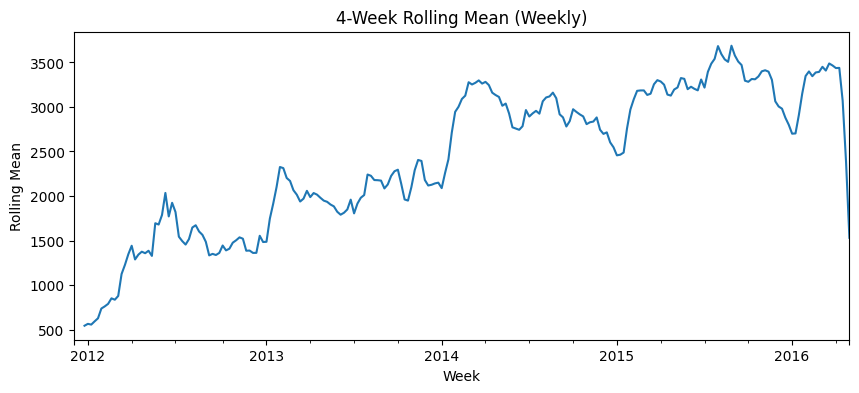

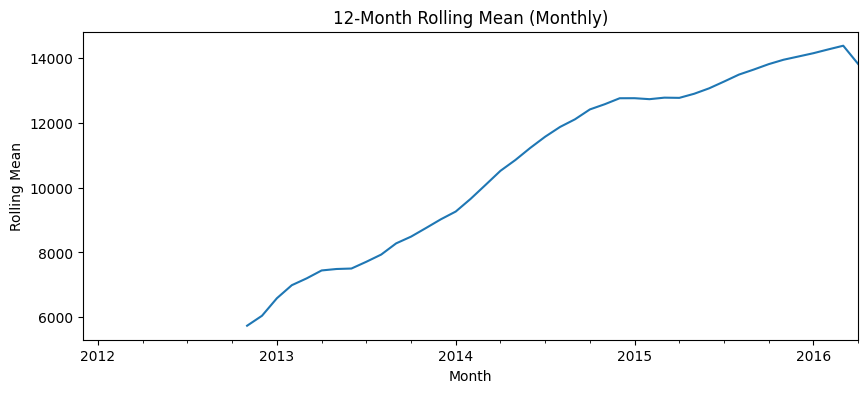

In [15]:
# 6. Compute rolling means for smoothing
rolling_4w = weekly_total.rolling(window=4).mean()
rolling_12m = monthly_total.rolling(window=12).mean()

plt.figure(figsize=(10,4))
rolling_4w.plot()
plt.title('4-Week Rolling Mean (Weekly)')
plt.ylabel('Rolling Mean')
plt.xlabel('Week')
plt.show()

plt.figure(figsize=(10,4))
rolling_12m.plot()
plt.title('12-Month Rolling Mean (Monthly)')
plt.ylabel('Rolling Mean')
plt.xlabel('Month')
plt.show()

<Figure size 1000x600 with 0 Axes>

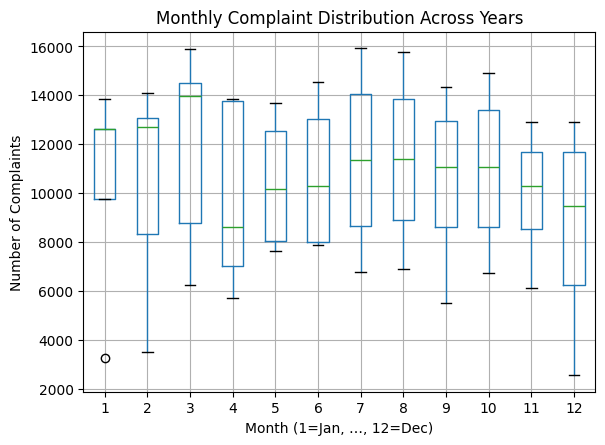

In [16]:
# 7. Seasonal subplots: boxplot of month-wise distribution
monthly_df = monthly_total.to_frame(name='complaints')
monthly_df['month'] = monthly_df.index.month

plt.figure(figsize=(10,6))
monthly_df.boxplot(column='complaints', by='month')
plt.title('Monthly Complaint Distribution Across Years')
plt.suptitle('')  # remove automatic title
plt.xlabel('Month (1=Jan, …, 12=Dec)')
plt.ylabel('Number of Complaints')
plt.show()

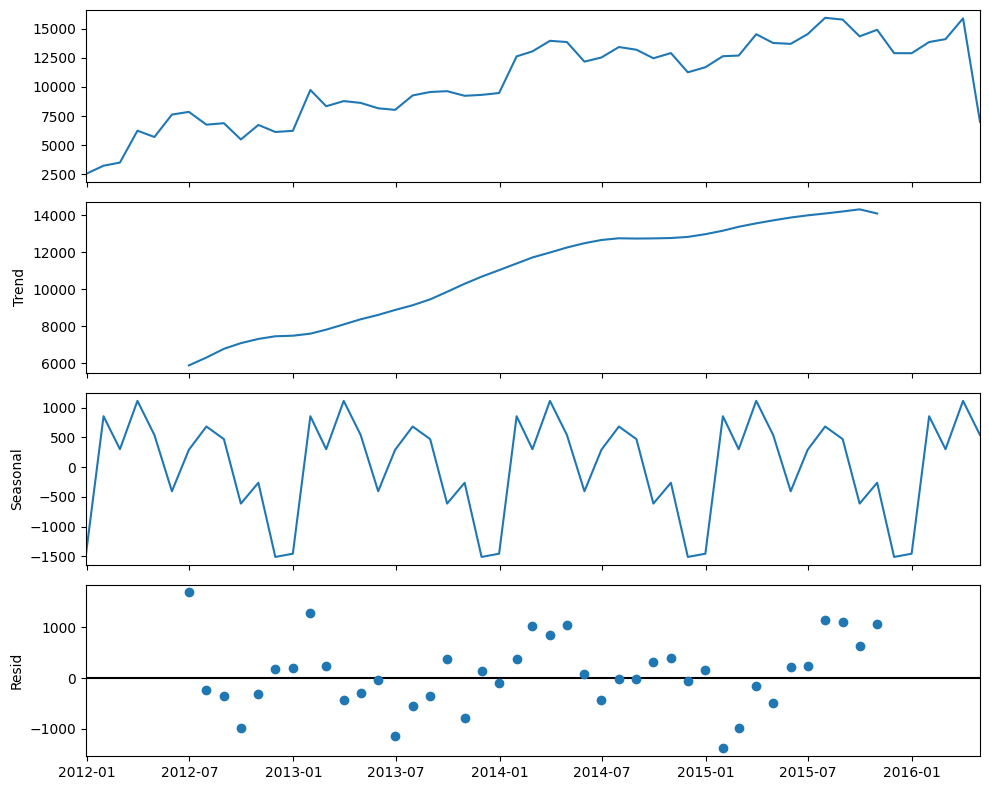

In [17]:
# 8. Decompose monthly series into trend, seasonality, and residuals
decomp = seasonal_decompose(monthly_total, model='additive')
plt.rcParams.update({'figure.figsize': (10, 8)})
decomp.plot()
plt.show()